In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from aging.plotting import figure, format_plots

In [46]:
format_plots()

In [2]:
bias_df = pd.read_parquet("/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_model-based_mouse_bias.parquet")

In [10]:
df = pd.read_parquet(
    "/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_relabeled_counts_matrix_v00.parquet"
)
df = df.sort_index(axis=1)

mask = df.index.get_level_values("age") < 100
df = df[mask].copy()
df = df.iloc[:, :55]

In [28]:
dists = squareform(pdist(bias_df.T, metric='correlation'))

In [29]:
np.argsort(dists[10])

array([10,  6,  8, 14,  7,  4, 11,  5, 12,  0,  2, 15,  1,  3, 13,  9])

In [11]:
animal = bias_df.columns[10]
animal

"('03_03',)"

In [30]:
animal2 = bias_df.columns[6]
animal2

"('02_03',)"

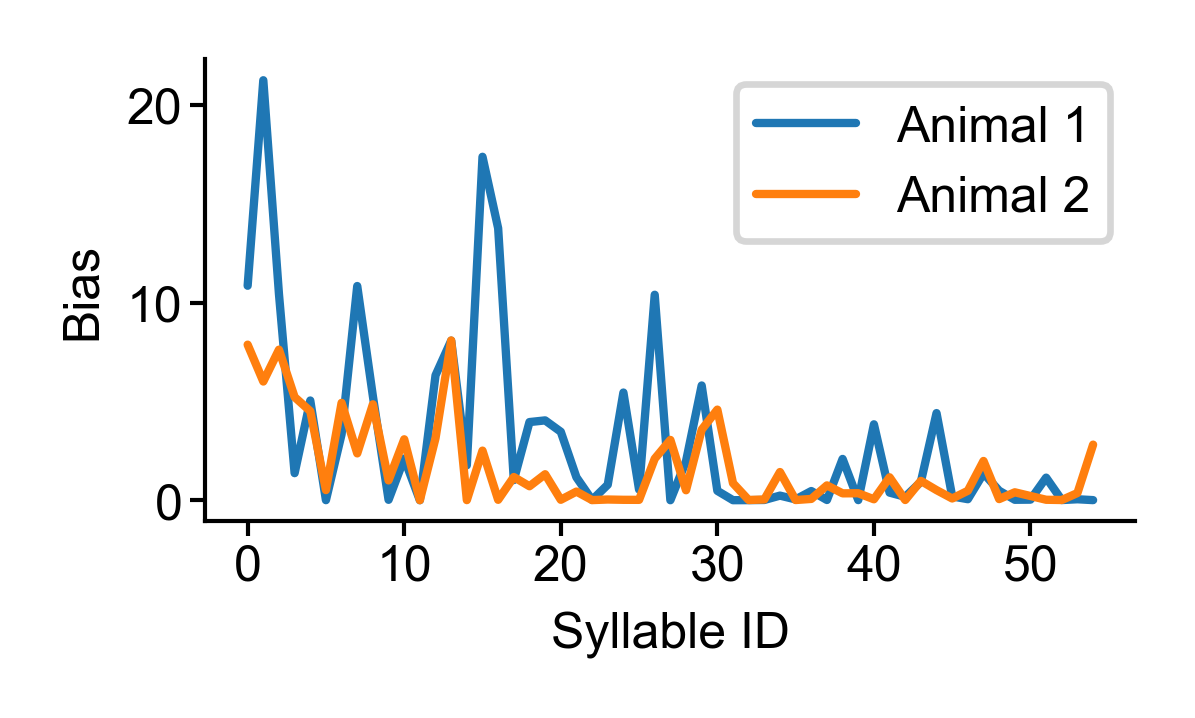

In [50]:
figure(2, 1)
plt.plot(bias_df.iloc[:, 10], label="Animal 1")
plt.plot(bias_df.iloc[:, 6], label="Animal 2")
plt.ylabel('Bias')
plt.xlabel("Syllable ID")
plt.legend()
sns.despine()

In [32]:
animal_mask = df.index.get_level_values("mouse") == "03_03"
animal_mask2 = df.index.get_level_values("mouse") == "02_03"

In [33]:
animal_df = df[animal_mask]
animal_df2 = df[animal_mask2]

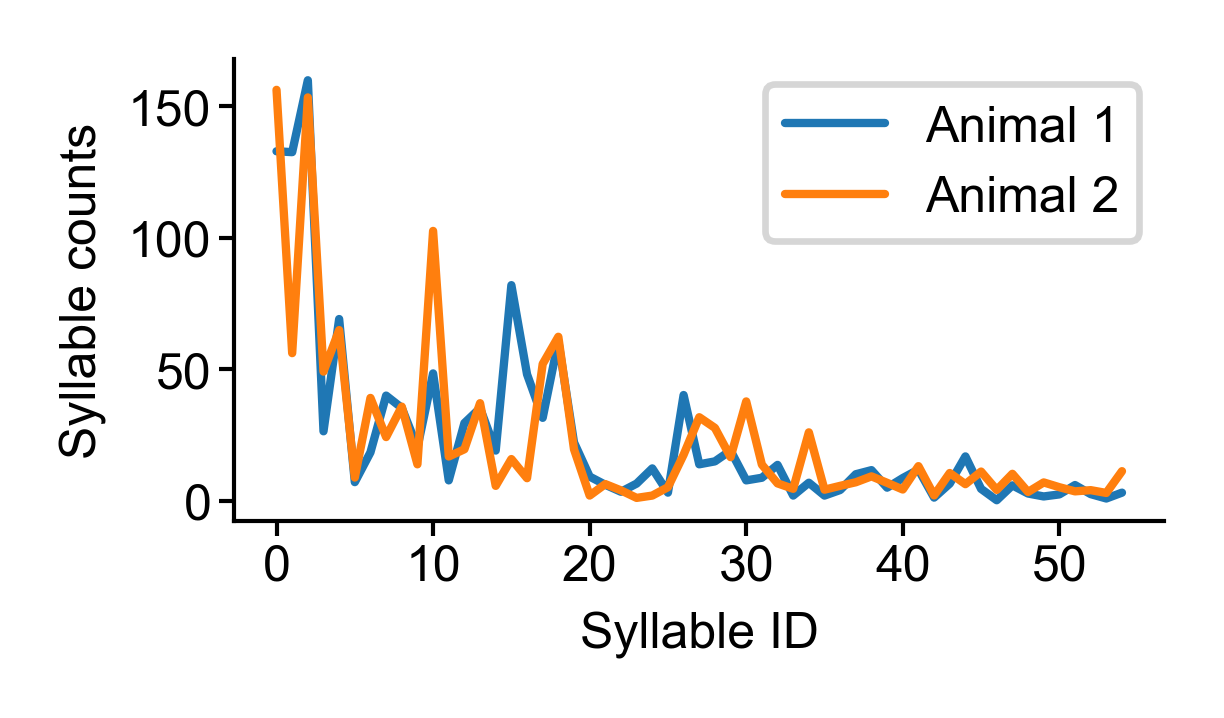

In [52]:
figure(2, 1)
plt.plot(animal_df.loc[20:].mean(), label="Animal 1")
plt.plot(animal_df2.loc[20:].mean(), label="Animal 2")
plt.xlabel("Syllable ID")
plt.ylabel("Syllable counts")
plt.legend()
sns.despine()

In [36]:
beh_diffs = animal_df.loc[20:].mean() - animal_df2.loc[20:].mean()
bias_diffs = bias_df.iloc[:, 10] - bias_df.iloc[:, 6]

In [59]:
r = beh_diffs.corr(bias_diffs)

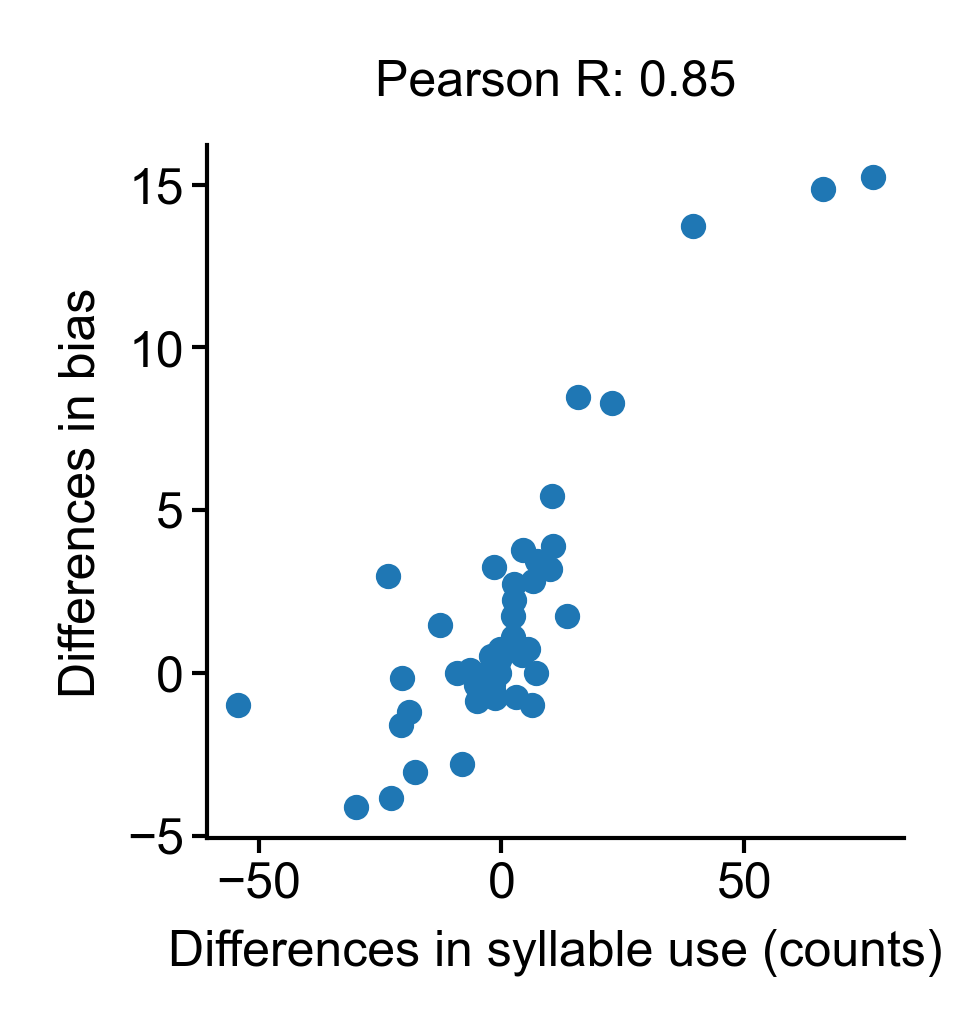

In [60]:
figure(1.5, 1.5)
plt.scatter(beh_diffs, bias_diffs, s=5)
plt.xlabel("Differences in syllable use (counts)")
plt.ylabel("Differences in bias")
plt.title(f"Pearson R: {r:0.2f}")
sns.despine()